In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
df = pd.read_csv('Alzheimers disease.csv',sep=";")

In [2]:
pd.set_option('display.max_columns', None)
df.columns=df.columns.str.replace('\s+','_')
df.head()

,Parent_Molecule_ChEMBL_ID,Parent_Molecule_Name,Parent_Molecule_Type,Max_Phase,First_Approval,USAN_Stem,Smiles,Mechanism_of_Action,Mechanism_Comment,Selectivity_Comment,Target_ChEMBL_ID,Target_Name,Action_Type,Target_Type,Target_Organism,Binding_Site_Name,Binding_Site_Comment,References,Synonyms,ATC_Codes,Level_4_ATC_Codes,Level_3_ATC_Codes,Level_2_ATC_Codes,Level_1_ATC_Codes,Parent_Molecule_ChEMBL_ID.1
0,CHEMBL429910,DAPAGLIFLOZIN,Small molecule,4,2014,'-gliflozin',CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]...,Sodium/glucose cotransporter 2 inhibitor,NaN,NaN,CHEMBL3884,Sodium/glucose cotransporter 2,INHIBITOR,SINGLE PROTEIN,Homo sapiens,NaN,NaN,Type: DailyMed RefID: setid=fc6ae30e-868b-4ac9...,"Dapagliflozin (FDA, INN)|Dapagliflozin propane...",A10BK01,A10BK - Sodium-glucose co-transporter 2 (SGLT2...,"A10B - BLOOD GLUCOSE LOWERING DRUGS, EXCL. INS...",A10 - DRUGS USED IN DIABETES,A - ALIMENTARY TRACT AND METABOLISM,CHEMBL429910
1,CHEMBL1908391,MASITINIB,Small molecule,3,None,'-tinib',Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nc(-...,Fibroblast growth factor receptor 3 inhibitor,Approved veterinary - 2012. Not recommended fo...,NaN,CHEMBL2742,Fibroblast growth factor receptor 3,INHIBITOR,SINGLE PROTEIN,Homo sapiens,NaN,NaN,Type: Other RefID: http://www.ema.europa.eu/do...,"Masitinib (MI, INN)|",L01XE22,L01XE - Protein kinase inhibitors,L01X - OTHER ANTINEOPLASTIC AGENTS,L01 - ANTINEOPLASTIC AGENTS,L - ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,CHEMBL1908391
2,CHEMBL595,PIOGLITAZONE,Small molecule,4,1999,'-glitazone',CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,Peroxisome proliferator-activated receptor gam...,NaN,NaN,CHEMBL235,Peroxisome proliferator-activated receptor gamma,AGONIST,SINGLE PROTEIN,Homo sapiens,NaN,NaN,Type: DailyMed RefID: setid=d2ddc491-88a9-4063...,"Pioglitazone (BAN, INN, MI)|Pioglitazone HCl (...",A10BG03,A10BG - Thiazolidinediones,"A10B - BLOOD GLUCOSE LOWERING DRUGS, EXCL. INS...",A10 - DRUGS USED IN DIABETES,A - ALIMENTARY TRACT AND METABOLISM,CHEMBL595
3,CHEMBL2105760,BREXPIPRAZOLE,Small molecule,4,2015,'-prazole',O=c1ccc2ccc(OCCCCN3CCN(c4cccc5sccc45)CC3)cc2[nH]1,Serotonin 1a (5-HT1a) receptor partial agonist,NaN,NaN,CHEMBL214,Serotonin 1a (5-HT1a) receptor,PARTIAL AGONIST,SINGLE PROTEIN,Homo sapiens,NaN,NaN,Type: FDA RefID: label/2015/205422s000lbl.pdf ...,"Brexpiprazole (FDA, INN, JAN, USAN)|",N05AX16,N05AX - Other antipsychotics,N05A - ANTIPSYCHOTICS,N05 - PSYCHOLEPTICS,N - NERVOUS SYSTEM,CHEMBL2105760
4,CHEMBL796,METHYLPHENIDATE,Small molecule,4,1955,NaN,COC(=O)C(c1ccccc1)C1CCCCN1,Norepinephrine transporter inhibitor,NaN,NaN,CHEMBL222,Norepinephrine transporter,INHIBITOR,SINGLE PROTEIN,Homo sapiens,NaN,NaN,Type: DailyMed RefID: setid=1a88218c-5b18-4220...,"Methylphenidate HCl (FDA, JAN, MI, USP)|Methyl...",N06BA04,N06BA - Centrally acting sympathomimetics,"N06B - PSYCHOSTIMULANTS, AGENTS USED FOR ADHD ...",N06 - PSYCHOANALEPTICS,N - NERVOUS SYSTEM,CHEMBL796


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Parent_Molecule_ChEMBL_ID    104 non-null    object 
 1   Parent_Molecule_Name         104 non-null    object 
 2   Parent_Molecule_Type         104 non-null    object 
 3   Max_Phase                    104 non-null    int64  
 4   First_Approval               104 non-null    object 
 5   USAN_Stem                    70 non-null     object 
 6   Smiles                       104 non-null    object 
 7   Mechanism_of_Action          104 non-null    object 
 8   Mechanism_Comment            26 non-null     object 
 9   Selectivity_Comment          6 non-null      object 
 10  Target_ChEMBL_ID             104 non-null    object 
 11  Target_Name                  104 non-null    object 
 12  Action_Type                  104 non-null    object 
 13  Target_Type         

In [4]:
df.Action_Type.unique()

array(['INHIBITOR', 'AGONIST', 'PARTIAL AGONIST', 'ANTAGONIST',
       'MODULATOR', 'INVERSE AGONIST', 'POSITIVE ALLOSTERIC MODULATOR',
       'BLOCKER', 'ACTIVATOR'], dtype=object)

In [5]:
df.Binding_Site_Comment.unique()

array([nan,
       'It binds competitively, and with high affinity (Ki = 2.0 nM) to 5-HT1a receptors'],
      dtype=object)

In [6]:
df.loc[df['Action_Type']=='AGONIST','Binding_Site_Comment'].unique()

array([nan,
       'It binds competitively, and with high affinity (Ki = 2.0 nM) to 5-HT1a receptors'],
      dtype=object)

In [7]:
df.Selectivity_Comment.unique()

array([nan, 'Selective',
       'High affinity: D3 and D4 receptors. Low affinity: a1, 5HT2A, 5HT2C, H1 and muscarinic receptors '],
      dtype=object)

In [8]:
df.Mechanism_Comment.unique()

array([nan,
       'Approved veterinary - 2012. Not recommended for approval (Negative opinion) in EU, phase 3 trials in US.',
       'It has neurotrophic and neuroprotective activities. Although its mechanism of action is not fully understood, xaliproden appears to either mimic the effects of neurotrophins or stimulate their synthesis, thereby stimulating neuronal cell differentiation and proliferation and inhibiting neuronal cell death.',
       'Atypical antipsychotic, shows partial agonism at the presynaptic D2 receptors and acts as an antagonist at postsynaptic D2 receptors (PMID: 25120104).',
       'Ph1b study completed in 2011 (no trial ID). Compound outlicensed to T3D Therapeutics Inc in 2013.',
       'Irreversible inhibitor',
       'It is an antibiotic, however, its primary action, due to the concentration reached in the human body is via metalloproteinases inhibition, which is beneficial in many pathological conditions in which MMP-mediated proteolysis of the extracellular

In [9]:
df=df.drop(['Binding_Site_Name'],axis=1)

In [10]:
comparsion_column=np.where(df['Parent_Molecule_ChEMBL_ID'] == df['Parent_Molecule_ChEMBL_ID.1'],'True','False')
df['equal']=comparsion_column
df.equal.unique()


array(['True'], dtype=object)

In [11]:
df=df.drop(['Parent_Molecule_ChEMBL_ID.1','equal'],axis=1)
df.head()

,Parent_Molecule_ChEMBL_ID,Parent_Molecule_Name,Parent_Molecule_Type,Max_Phase,First_Approval,USAN_Stem,Smiles,Mechanism_of_Action,Mechanism_Comment,Selectivity_Comment,Target_ChEMBL_ID,Target_Name,Action_Type,Target_Type,Target_Organism,Binding_Site_Comment,References,Synonyms,ATC_Codes,Level_4_ATC_Codes,Level_3_ATC_Codes,Level_2_ATC_Codes,Level_1_ATC_Codes
0,CHEMBL429910,DAPAGLIFLOZIN,Small molecule,4,2014,'-gliflozin',CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]...,Sodium/glucose cotransporter 2 inhibitor,NaN,NaN,CHEMBL3884,Sodium/glucose cotransporter 2,INHIBITOR,SINGLE PROTEIN,Homo sapiens,NaN,Type: DailyMed RefID: setid=fc6ae30e-868b-4ac9...,"Dapagliflozin (FDA, INN)|Dapagliflozin propane...",A10BK01,A10BK - Sodium-glucose co-transporter 2 (SGLT2...,"A10B - BLOOD GLUCOSE LOWERING DRUGS, EXCL. INS...",A10 - DRUGS USED IN DIABETES,A - ALIMENTARY TRACT AND METABOLISM
1,CHEMBL1908391,MASITINIB,Small molecule,3,None,'-tinib',Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nc(-...,Fibroblast growth factor receptor 3 inhibitor,Approved veterinary - 2012. Not recommended fo...,NaN,CHEMBL2742,Fibroblast growth factor receptor 3,INHIBITOR,SINGLE PROTEIN,Homo sapiens,NaN,Type: Other RefID: http://www.ema.europa.eu/do...,"Masitinib (MI, INN)|",L01XE22,L01XE - Protein kinase inhibitors,L01X - OTHER ANTINEOPLASTIC AGENTS,L01 - ANTINEOPLASTIC AGENTS,L - ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS
2,CHEMBL595,PIOGLITAZONE,Small molecule,4,1999,'-glitazone',CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,Peroxisome proliferator-activated receptor gam...,NaN,NaN,CHEMBL235,Peroxisome proliferator-activated receptor gamma,AGONIST,SINGLE PROTEIN,Homo sapiens,NaN,Type: DailyMed RefID: setid=d2ddc491-88a9-4063...,"Pioglitazone (BAN, INN, MI)|Pioglitazone HCl (...",A10BG03,A10BG - Thiazolidinediones,"A10B - BLOOD GLUCOSE LOWERING DRUGS, EXCL. INS...",A10 - DRUGS USED IN DIABETES,A - ALIMENTARY TRACT AND METABOLISM
3,CHEMBL2105760,BREXPIPRAZOLE,Small molecule,4,2015,'-prazole',O=c1ccc2ccc(OCCCCN3CCN(c4cccc5sccc45)CC3)cc2[nH]1,Serotonin 1a (5-HT1a) receptor partial agonist,NaN,NaN,CHEMBL214,Serotonin 1a (5-HT1a) receptor,PARTIAL AGONIST,SINGLE PROTEIN,Homo sapiens,NaN,Type: FDA RefID: label/2015/205422s000lbl.pdf ...,"Brexpiprazole (FDA, INN, JAN, USAN)|",N05AX16,N05AX - Other antipsychotics,N05A - ANTIPSYCHOTICS,N05 - PSYCHOLEPTICS,N - NERVOUS SYSTEM
4,CHEMBL796,METHYLPHENIDATE,Small molecule,4,1955,NaN,COC(=O)C(c1ccccc1)C1CCCCN1,Norepinephrine transporter inhibitor,NaN,NaN,CHEMBL222,Norepinephrine transporter,INHIBITOR,SINGLE PROTEIN,Homo sapiens,NaN,Type: DailyMed RefID: setid=1a88218c-5b18-4220...,"Methylphenidate HCl (FDA, JAN, MI, USP)|Methyl...",N06BA04,N06BA - Centrally acting sympathomimetics,"N06B - PSYCHOSTIMULANTS, AGENTS USED FOR ADHD ...",N06 - PSYCHOANALEPTICS,N - NERVOUS SYSTEM


In [12]:
duplicate = df[df.duplicated()]
duplicate.count().sum()

0

Text(0.5, 1.0, 'Max phase of each Action Type')

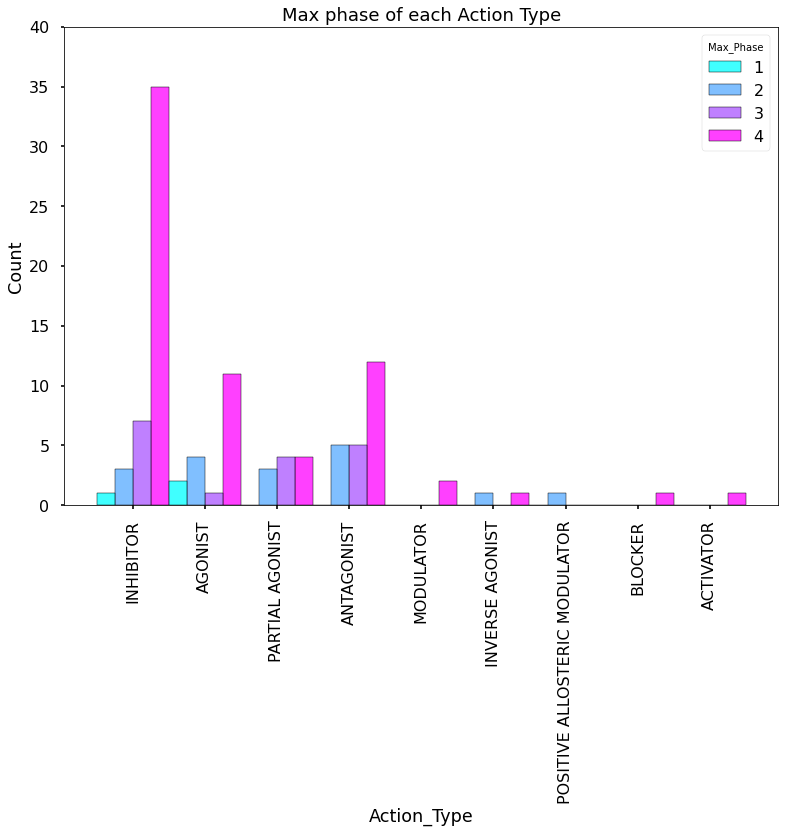

In [13]:
sns.histplot(data=df, x='Action_Type',hue='Max_Phase',palette='cool',multiple='dodge')
plt.ylim(0,40)
plt.xticks(rotation=90)
plt.title('Max phase of each Action Type', fontsize=18)

In [14]:
df.loc[df['Mechanism_Comment']=='Orally bioavailable small molecule BACE1 inhibitor, has shown robust lowering of cerebral amyloid-beta in preclinical and clinical studies','Target_ChEMBL_ID']


83    CHEMBL4822
Name: Target_ChEMBL_ID, dtype: object

In [15]:
pd.set_option("display.max_colwidth", -1)
df.loc[df['Target_ChEMBL_ID']=='CHEMBL4822','Smiles']

83    C[C@H]1OC[C@]2(c3cc(NC(=O)c4cnc(C(F)F)cn4)ccc3F)N=C(N)SC[C@H]12
Name: Smiles, dtype: object

In [16]:
pd.set_option("display.max_colwidth", -1)
df.loc[df['Target_ChEMBL_ID']=='CHEMBL4822','Mechanism_of_Action']

83    Beta-secretase 1 inhibitor
Name: Mechanism_of_Action, dtype: object

In [17]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs

RDKit WARNING: [09:58:34] Enabling RDKit 2019.09.3 jupyter extensions


In [22]:
pd.set_option("display.max_colwidth", -1)
df.loc[df['Mechanism_of_Action']=='Serotonin transporter inhibitor']

,Parent_Molecule_ChEMBL_ID,Parent_Molecule_Name,Parent_Molecule_Type,Max_Phase,First_Approval,USAN_Stem,Smiles,Mechanism_of_Action,Mechanism_Comment,Selectivity_Comment,Target_ChEMBL_ID,Target_Name,Action_Type,Target_Type,Target_Organism,Binding_Site_Comment,References,Synonyms,ATC_Codes,Level_4_ATC_Codes,Level_3_ATC_Codes,Level_2_ATC_Codes,Level_1_ATC_Codes
53,CHEMBL621,TRAZODONE,Small molecule,4,1981,NaN,O=c1n(CCCN2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,Serotonin transporter inhibitor,NaN,NaN,CHEMBL228,Serotonin transporter,INHIBITOR,SINGLE PROTEIN,Homo sapiens,NaN,"Type: FDA RefID: label/2013/071258Orig1s040, 071196Orig1s063lbl.pdf URL: http://www.accessdata.fda.gov/drugsatfda_docs/label/2013/071258Orig1s040, 071196Orig1s063lbl.pdf","Trazodone HCl (FDA, JAN, MI, USAN, USP)|Trazodone (BAN, INN, MI)|",N06AX05,N06AX - Other antidepressants,N06A - ANTIDEPRESSANTS,N06 - PSYCHOANALEPTICS,N - NERVOUS SYSTEM
67,CHEMBL1508,ESCITALOPRAM,Small molecule,4,2002,NaN,CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(C#N)ccc21,Serotonin transporter inhibitor,reuptake inhibitor,NaN,CHEMBL228,Serotonin transporter,INHIBITOR,SINGLE PROTEIN,Homo sapiens,NaN,Type: DailyMed RefID: setid=2db02476-325f-ee47-a7e5-b5aed56c364c#nlm34090-1 URL: http://dailymed.nlm.nih.gov/dailymed/lookup.cfm?setid=2db02476-325f-ee47-a7e5-b5aed56c364c#nlm34090-1|Type: Wikipedia RefID: Escitalopram URL: http://en.wikipedia.org/wiki/Escitalopram,"Escitalopram (BAN, INN, MI)|Escitalopram Oxalate (FDA, JAN, MI, USAN, USP)|",N06AB10,N06AB - Selective serotonin reuptake inhibitors,N06A - ANTIDEPRESSANTS,N06 - PSYCHOANALEPTICS,N - NERVOUS SYSTEM
77,CHEMBL3306803,LUMATEPERONE,Small molecule,3,None,'-perone',CN1CCN2c3c(cccc31)[C@@H]1CN(CCCC(=O)c3ccc(F)cc3)CC[C@@H]12,Serotonin transporter inhibitor,"Atypical antipsychotic, shows partial agonism at the presynaptic D2 receptors and acts as an antagonist at postsynaptic D2 receptors (PMID: 25120104).",NaN,CHEMBL228,Serotonin transporter,INHIBITOR,SINGLE PROTEIN,Homo sapiens,NaN,Type: Other RefID: http://www.intracellulartherapies.com/products-technology/iti-007.html URL: http://www.intracellulartherapies.com/products-technology/iti-007.html|Type: PubMed RefID: 24559051 URL: http://europepmc.org/abstract/MED/24559051|Type: PubMed RefID: 25120104 URL: http://europepmc.org/abstract/MED/25120104,Lumateperone tosylate (USAN)|Lumateperone (USAN)|,NaN,NaN,NaN,NaN,NaN
89,CHEMBL637,VENLAFAXINE,Small molecule,4,1993,'-faxine',COc1ccc(C(CN(C)C)C2(O)CCCCC2)cc1,Serotonin transporter inhibitor,NaN,NaN,CHEMBL228,Serotonin transporter,INHIBITOR,SINGLE PROTEIN,Homo sapiens,NaN,Type: DailyMed RefID: setid=f2f03495-12b6-457a-901f-958b9c844bfd#nlm34090-1 URL: http://dailymed.nlm.nih.gov/dailymed/lookup.cfm?setid=f2f03495-12b6-457a-901f-958b9c844bfd#nlm34090-1,"Venlafaxine (BAN, INN, MI)|Venlafaxine HCl (FDA, JAN, MI, USAN, USP)|",N06AX16,N06AX - Other antidepressants,N06A - ANTIDEPRESSANTS,N06 - PSYCHOANALEPTICS,N - NERVOUS SYSTEM


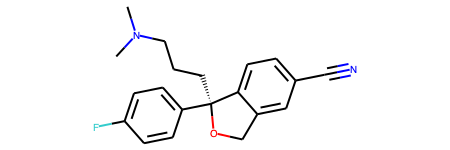

In [25]:
smiles1508 = 'CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(C#N)ccc21'
mol1508 = Chem.MolFromSmiles(smiles1508)
mol1508


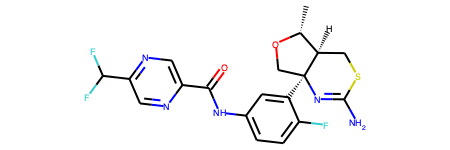

In [16]:
smiles4822 = 'C[C@H]1OC[C@]2(c3cc(NC(=O)c4cnc(C(F)F)cn4)ccc3F)N=C(N)SC[C@H]12'
mol4822 = Chem.MolFromSmiles(smiles4822)
mol4822


In [149]:
info={}
fp = AllChem.GetMorganFingerprintAsBitVect(mol4822,2,nBits=2048,bitInfo=info)
res = np.zeros(len(fp), np.int32)
DataStructs.ConvertToNumpyArray(fp,res)

In [150]:
df.loc[df['Action_Type']=='INHIBITOR','ATC_Codes'].dropna().unique()

array(['A10BK01', 'L01XE22', 'N06BA04', 'L01XX33 | M01AH01', 'L01XE06',
       'N04BD01', 'N06DA04', 'N06AX12', 'L01XX38', 'N04BD02',
       'A01AB22 | J01AA02', 'N06DA02', 'N06BA09', 'N05AN01', 'L01XE08',
       'G04BE11', 'M01AH02', 'N03AG01', 'N06AX05', 'N06AX16', 'C10AA01',
       'N06AB10', 'B01AA03', 'N06BA07', 'C10AA05'], dtype=object)

In [151]:
pd.set_option("display.max_colwidth", -1)
df.loc[df['ATC_Codes']=='L01XE22','Smiles']

1     Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nc(-c2cccnc2)cs1
57    Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nc(-c2cccnc2)cs1
Name: Smiles, dtype: object

In [152]:
df.loc[df['ATC_Codes']=='L01XE22','Target_ChEMBL_ID']

1     CHEMBL2742
57    CHEMBL1936
Name: Target_ChEMBL_ID, dtype: object

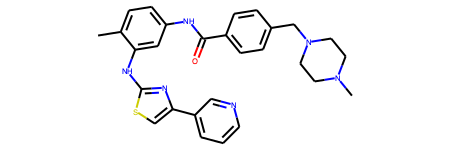

In [153]:
smiles22 = 'Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nc(-c2cccnc2)cs1'
mol22 = Chem.MolFromSmiles(smiles22)
mol22

In [154]:
info={}
fp = AllChem.GetMorganFingerprintAsBitVect(mol22,2,nBits=2048,bitInfo=info)
res = np.zeros(len(fp), np.int32)
DataStructs.ConvertToNumpyArray(fp,res)

In [155]:
pd.set_option("display.max_colwidth", -1)
df.loc[df['ATC_Codes']=='N06AX12','Smiles']

21    CC(NC(C)(C)C)C(=O)c1cccc(Cl)c1
41    CC(NC(C)(C)C)C(=O)c1cccc(Cl)c1
Name: Smiles, dtype: object

In [156]:
df.loc[df['ATC_Codes']=='N06AX12','Target_ChEMBL_ID']

21    CHEMBL222
41    CHEMBL238
Name: Target_ChEMBL_ID, dtype: object

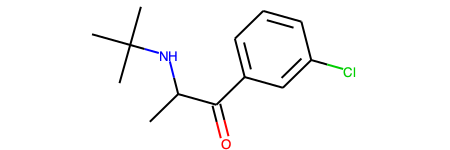

In [157]:
smiles12 = 'CC(NC(C)(C)C)C(=O)c1cccc(Cl)c1'
mol12 = Chem.MolFromSmiles(smiles12)
mol12

In [158]:
info={}
fp = AllChem.GetMorganFingerprintAsBitVect(mol12,2,nBits=2048,bitInfo=info)
res = np.zeros(len(fp), np.int32)
DataStructs.ConvertToNumpyArray(fp,res)

Text(0, 0.5, 'Count')

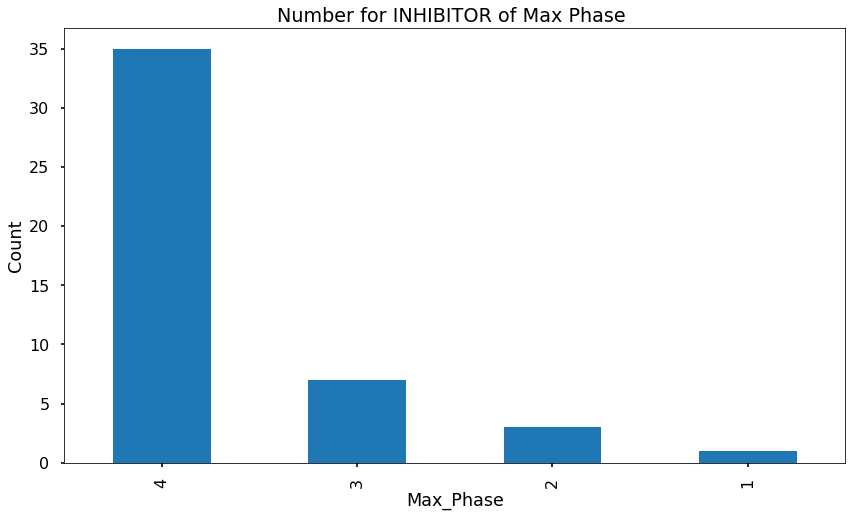

In [159]:
ax_mp=df.loc[df['Action_Type']=='INHIBITOR','Max_Phase'].dropna().value_counts().plot(kind='bar',figsize=(14,8),title = 'Number for INHIBITOR of Max Phase ')
ax_mp.set_xlabel('Max_Phase')
ax_mp.set_ylabel('Count')

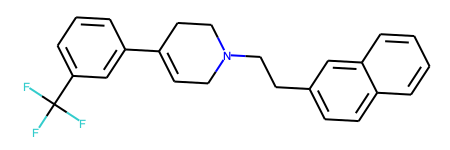

In [160]:
smiles214 = 'FC(F)(F)c1cccc(C2=CCN(CCc3ccc4ccccc4c3)CC2)c1'
mol214 = Chem.MolFromSmiles(smiles214)
mol214

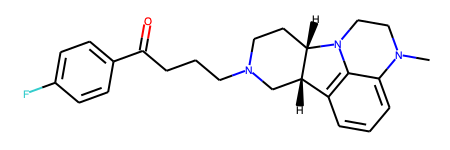

In [161]:
smiles224 = 'CN1CCN2c3c(cccc31)[C@@H]1CN(CCCC(=O)c3ccc(F)cc3)CC[C@@H]12'
mol224 = Chem.MolFromSmiles(smiles224)
mol224

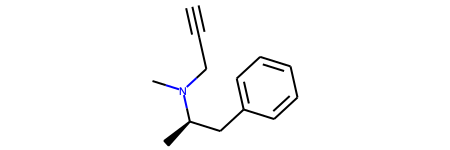

In [162]:
smiles2039 = 'C#CCN(C)[C@H](C)Cc1ccccc1'
mol2039 = Chem.MolFromSmiles(smiles2039)
mol2039

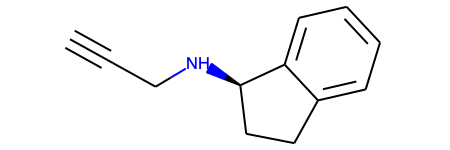

In [163]:
smiles2039_1 = 'C#CCN[C@@H]1CCc2ccccc21'
mol2039_1 = Chem.MolFromSmiles(smiles2039_1)
mol2039_1

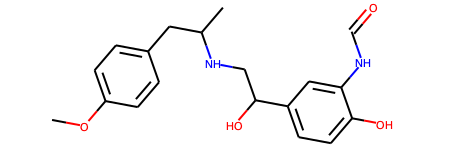

In [164]:
smiles210 = 'COc1ccc(CC(C)NCC(O)c2ccc(O)c(NC=O)c2)cc1'
mol210 = Chem.MolFromSmiles(smiles210)
mol210

In [165]:
pd.set_option("display.max_colwidth", -1)
df.loc[df['Target_ChEMBL_ID']=='CHEMBL2492',"Smiles"]

34    None                                            
44    c1ccc(-c2nnc(O[C@@H]3C4CC5C[C@H]3CN(C5)C4)s2)cc1
52    c1cnc2c(c1)C[C@@]1(CN3CCC1CC3)O2                
60    O=C(N[C@H]1CN2CCC1CC2)c1cc2cccc(Cl)c2s1         
64    Cc1ccc(-c2ccc(OC3CN4CCC3CC4)cn2)cc1             
98    O=C(Oc1ccc(Br)cc1)N1CCN2CCC1CC2                 
Name: Smiles, dtype: object

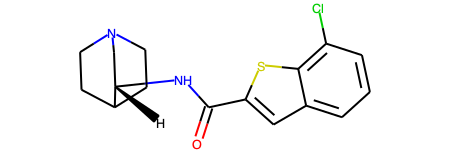

In [166]:
smiles2492 = 'O=C(N[C@H]1CN2CCC1CC2)c1cc2cccc(Cl)c2s1'
mol2492 = Chem.MolFromSmiles(smiles2492)
mol2492

In [167]:
df['Level_1_ATC_Codes'].fillna('nan',inplace=True)


In [168]:
df_new = df[df['Level_1_ATC_Codes'].isin(['N - NERVOUS SYSTEM', 'N - NERVOUS SYSTEM | R - RESPIRATORY SYSTEM',\
                                                  'C - CARDIOVASCULAR SYSTEM', \
                                                  'A - ALIMENTARY TRACT AND METABOLISM | S - SENSORY ORGANS | A - ALIMENTARY TRACT AND METABOLISM | N - NERVOUS SYSTEM',\
                                                  'B - BLOOD AND BLOOD FORMING ORGANS','nan'])]

In [169]:
from natsort import index_natsorted
df_new=df_new.sort_values(by='First_Approval', key=lambda x: np.argsort(index_natsorted(df_new["First_Approval"])))


Text(0.5, 1.0, 'Max phase and Action Type Of First Approval')

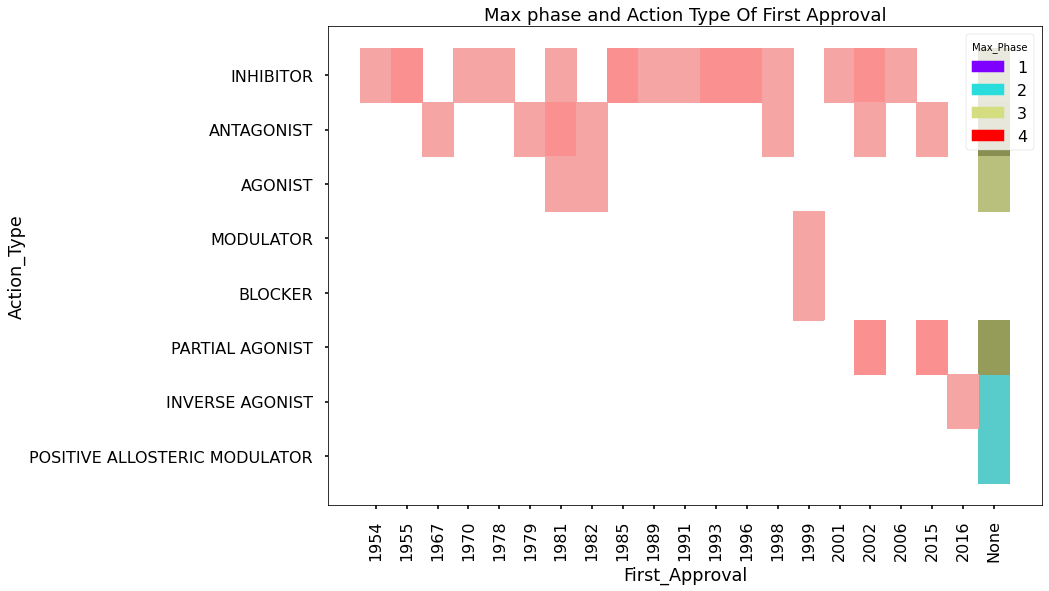

In [170]:
sns.histplot(x='First_Approval', y='Action_Type',hue='Max_Phase',data=df_new,palette='rainbow')
plt.xticks(rotation=90)
plt.title('Max phase and Action Type Of First Approval', fontsize=18)

In [171]:
targetname = df_new[['Target_Name']].groupby(['Target_Name']).size().nlargest(3).reset_index(name='Count')
targetname

,Target_Name,Count
0,Neuronal acetylcholine receptor protein alpha-7 subunit,6
1,Serotonin 2a (5-HT2a) receptor,6
2,Serotonin 1a (5-HT1a) receptor,5


(array([0, 1, 2]),
 [Text(0, 0, 'Neuronal acetylcholine receptor protein alpha-7 subunit'),
  Text(1, 0, 'Serotonin 2a (5-HT2a) receptor'),
  Text(2, 0, 'Serotonin 1a (5-HT1a) receptor')])

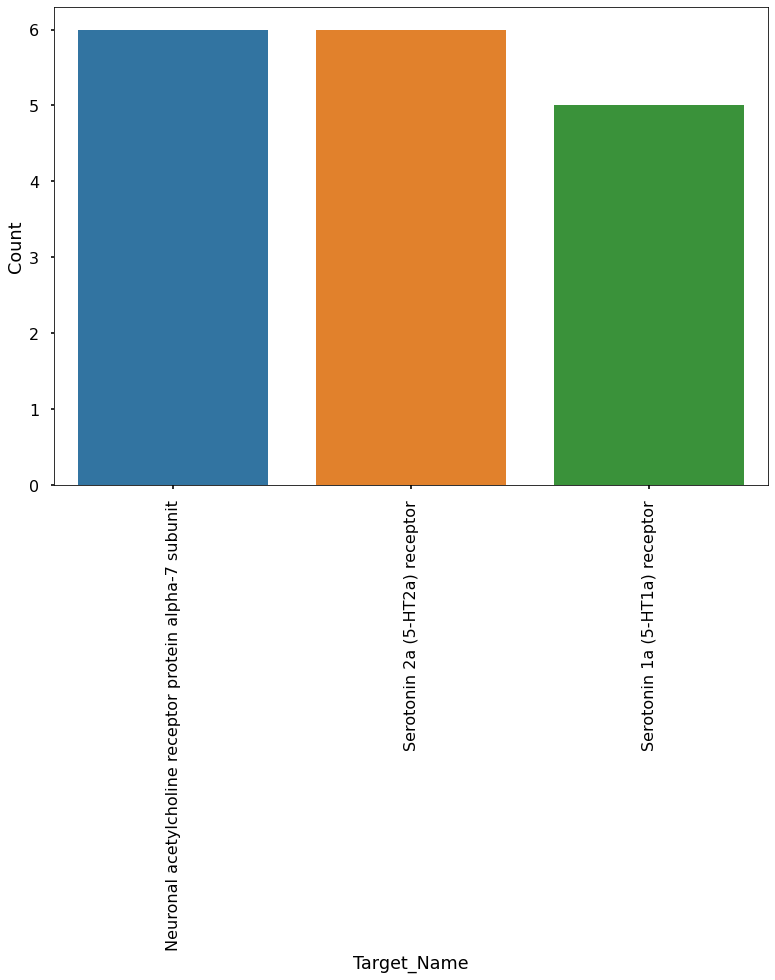

In [172]:
sns.barplot(x='Target_Name',y='Count',data=targetname)
plt.xticks(rotation=90)

In [173]:
df_result = df[df['Target_ChEMBL_ID'].isin(['CHEMBL2492','CHEMBL2039','CHEMBL224','CHEMBL214','CHEMBL4822'])]

In [174]:
df_result.dropna(subset=['Mechanism_Comment'], how='any',inplace=True)

In [175]:
df_result=df_result.loc[df_result['Max_Phase']>2]

Text(0.5, 1.0, 'The Max Phase and Action Type of Target Name')

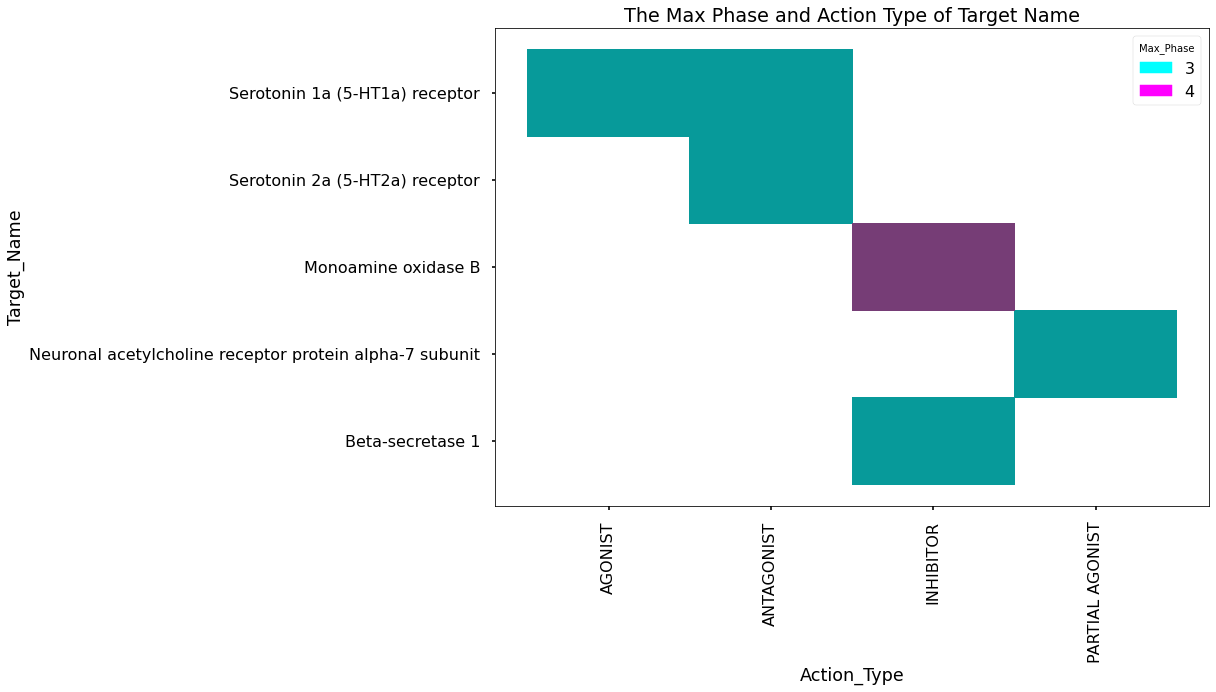

In [176]:
sns.histplot(x='Action_Type',y='Target_Name',hue='Max_Phase',multiple='dodge',data=df_result,palette='cool')
plt.xticks(rotation=90)
plt.title('The Max Phase and Action Type of Target Name')

In [177]:
from collections import defaultdict

def leaders(xs, top=10):
    counts = defaultdict(int)
    for x in xs:
        counts[x] += 1
    return sorted(counts.items(), reverse=True, key=lambda tup: tup[1])[:top]

Text(0.5, 1.0, 'Max phase of Action Type')

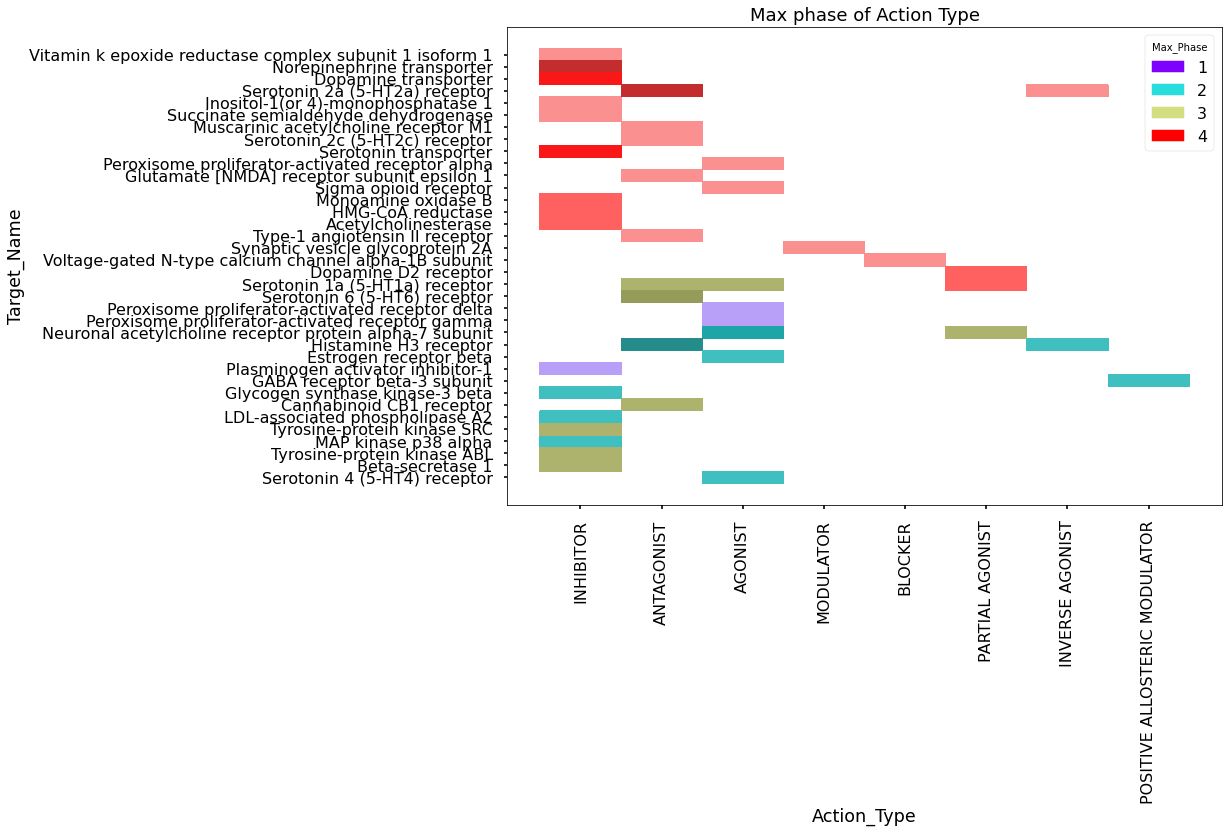

In [178]:
sns.histplot(x='Action_Type',y='Target_Name', hue='Max_Phase',data=df_new,palette='rainbow')
plt.xticks(rotation=90)
plt.title('Max phase of Action Type', fontsize=18)

In [179]:
tm = leaders(df.Target_Name)
tm

[('Serotonin 2a (5-HT2a) receptor', 6),
 ('Neuronal acetylcholine receptor protein alpha-7 subunit', 6),
 ('Serotonin 1a (5-HT1a) receptor', 5),
 ('Dopamine D2 receptor', 5),
 ('Norepinephrine transporter', 4),
 ('Serotonin 6 (5-HT6) receptor', 4),
 ('Histamine H3 receptor', 4),
 ('Serotonin transporter', 4),
 ('Peroxisome proliferator-activated receptor gamma', 3),
 ('Progesterone receptor', 3)]

In [180]:
tn = df[['Target_Name']].groupby(['Target_Name']).size().nlargest(5).reset_index(name='Count')
tn

,Target_Name,Count
0,Neuronal acetylcholine receptor protein alpha-7 subunit,6
1,Serotonin 2a (5-HT2a) receptor,6
2,Dopamine D2 receptor,5
3,Serotonin 1a (5-HT1a) receptor,5
4,Histamine H3 receptor,4


Text(0.5, 1.0, 'The number of Target name')

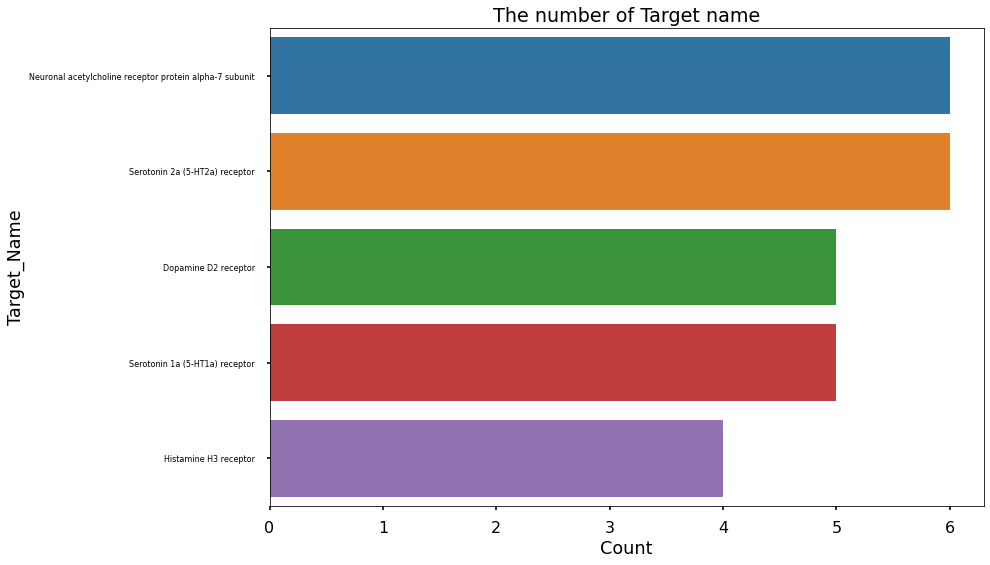

In [181]:
sns.barplot(x='Count',y='Target_Name',data=tn)
plt.yticks(size=8)
plt.title('The number of Target name')

<AxesSubplot:xlabel='Max_Phase', ylabel='count'>

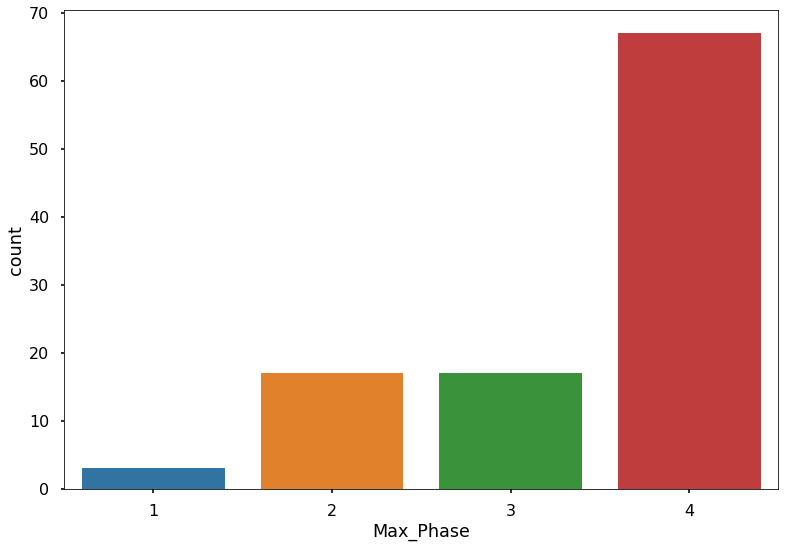

In [182]:
sns.countplot(x='Max_Phase',data=df)

In [183]:
df_target=pd.read_csv('target4.csv',sep=';')

In [184]:
pd.set_option("display.max_colwidth", 100)
pd.set_option('display.max_columns', None)
df_target.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL4539943,NaN,0,505.57,1,3.60,None,O=C(c1ccc(OCCC2CCOCC2)cc1)[C@@H]1CC[C@H](Cn2nnc3ccccc3c2=O)[C@H]1C(=O)O,Inhibition,'=',10.18,%,NaN,NaN,Not Active,UO_0000187,NaN,NaN,NaN,NaN,False,CHEMBL4507817,GPCRScan assay: inhibition of SERT,B,BAO_0000357,single protein format,Homo sapiens,None,None,None,None,Parental cells: stable HEK | PMID: 3475452/20036748 | Protein length: full-length | Radioligand ...,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL4507264,54,Donated Chemical Probes - SGC Frankfurt,NaN,NaN,None,Compound concentration None 10.0 uM
1,CHEMBL246873,NaN,0,385.94,0,4.22,12b,Clc1ccc(C2CNCc3cc(OCCCN4CCCCC4)ncc32)cc1,Ki,'=',141.00,nM,6.85,NaN,NaN,UO_0000065,17.75,0.35,2.63,18.32,False,CHEMBL886655,Binding affinity to human SERT,B,BAO_0000357,single protein format,Homo sapiens,None,None,None,None,NaN,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL1139156,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2007.0,None,NaN
2,CHEMBL3986502,NaN,0,349.58,1,5.26,BDBM202587,CCOc1ccc(C2(C(CC(C)C)NCCSCC)CCC2)cc1,Ki,'=',3.31,nM,8.48,NaN,359350,UO_0000065,24.26,0.48,3.22,39.89,False,CHEMBL3887870,Radioligand Binding Assay: The compounds were evaluated using well established radioligand bindi...,B,BAO_0000357,single protein format,Homo sapiens,None,None,None,None,NaN,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL3886482,37,BindingDB Database,NaN,2016.0,None,NaN
3,CHEMBL3186763,NaN,0,367.41,0,2.75,"45, ML336",CN1CCN(C)/C(=N/c2ccc([N+](=O)[O-])cc2C(=O)Nc2ccccc2)C1,Inhibition,'=',-5.97,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,False,CHEMBL3384282,Displacement of [3H]paroxetine from human SERT at 10 uM,B,BAO_0000357,single protein format,Homo sapiens,None,None,None,None,NaN,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL3352189,1,Scientific Literature,J. Med. Chem.,2014.0,None,NaN
4,CHEMBL4169479,NaN,0,384.56,0,3.67,10d,O[C@H]1Cc2ccccc2C2(CCC(N3CCN(C4CCCCC4)CC3)CC2)O1,Inhibition,'<',50.00,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,False,CHEMBL4158763,Inhibition of SERT (unknown origin) at 1 uM relative to control,B,BAO_0000357,single protein format,Homo sapiens,None,None,None,None,NaN,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL4152385,1,Scientific Literature,J Med Chem,2018.0,None,NaN


In [185]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Molecule ChEMBL ID          2660 non-null   object 
 1   Molecule Name               207 non-null    object 
 2   Molecule Max Phase          2660 non-null   int64  
 3   Molecular Weight            2660 non-null   object 
 4   #RO5 Violations             2660 non-null   object 
 5   AlogP                       2660 non-null   object 
 6   Compound Key                2660 non-null   object 
 7   Smiles                      2633 non-null   object 
 8   Standard Type               2660 non-null   object 
 9   Standard Relation           2544 non-null   object 
 10  Standard Value              2544 non-null   float64
 11  Standard Units              2470 non-null   object 
 12  pChEMBL Value               1795 non-null   float64
 13  Data Validity Comment       33 no

In [186]:
df_target=df_target.drop(['Assay Variant Accession','Assay Variant Mutation'],axis=1)

In [187]:
df_target['Assay Type'].unique()

array(['B', 'A'], dtype=object)

In [188]:
df_target['Target ChEMBL ID'].unique()

array(['CHEMBL228'], dtype=object)

In [189]:
df_target=df_target.drop(['Assay Tissue ChEMBL ID','Assay Tissue Name','Assay Cell Type','Assay Subcellular Fraction',\
                         'Target Name','Target Organism','Target Type'],axis=1)

In [190]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Molecule ChEMBL ID     2660 non-null   object 
 1   Molecule Name          207 non-null    object 
 2   Molecule Max Phase     2660 non-null   int64  
 3   Molecular Weight       2660 non-null   object 
 4   #RO5 Violations        2660 non-null   object 
 5   AlogP                  2660 non-null   object 
 6   Compound Key           2660 non-null   object 
 7   Smiles                 2633 non-null   object 
 8   Standard Type          2660 non-null   object 
 9   Standard Relation      2544 non-null   object 
 10  Standard Value         2544 non-null   float64
 11  Standard Units         2470 non-null   object 
 12  pChEMBL Value          1795 non-null   float64
 13  Data Validity Comment  33 non-null     object 
 14  Comment                281 non-null    object 
 15  Uo U

In [191]:
df_target['Data Validity Comment'].unique()

array([nan, 'Outside typical range', 'Potential transcription error'],
      dtype=object)

In [192]:
df_target['Compound Key'].unique()

array(['None', '12b', 'BDBM202587', '45, ML336', '10d', 'Paroxetine',
       '4l', '4b', '31', 'Ziprasidone', 'Nicotinamide derivative, 2',
       '15', '39-rac', '24', '57', '8j', '35', '9l', '(R)-8', '10c', '17',
       '59', '54', 'Flip-IDAM, 4', '59; DOV 216303', '4, A-987306', '1-I',
       '13m', '63', 'rac-10e', '4', '8i', '19', '(+)-16', '2a', '25-(-)',
       'BDBM172728', '3', '1', 'bupropion', '9g', '(-)-1b (trans)', '22',
       '11', '25', 'chlorpromazine', '18c', '73', '75', '70', '30-rac',
       '9c', '5i', '13c', '3e', '(1s)sertraline', '13', '26', '12u',
       'rac-9m', '9', '9j', '10', 'cocaine', '6', 'A6, A-349821', '6c',
       '4a; PF-06761281', '58', '63; NS2330', '35, ML315', '16d',
       '25b, ST-1535', '26-rac', '2a (trans)', '29', '4d', '2c',
       '168, syn-enantiomer-2', '2g', 'fluoxetine', '16-isomer4', '18',
       '8', '2, (+/-)-M1', '4, trans-racemic', 'table 4,1', '15h', '5',
       '34', '5h', '23', '1a, AMDA', '1b', 'table 3,2', '2', '12h',
      

In [193]:
df_target['Comment'].unique()

array(['Not Active', nan, '359350', 'Not Determined', '382331',
       'Dose-dependent effect', '228536', '228532', '228530', '359345',
       'Active', '382322', '382323', '379177', '359348', '379180',
       '382330', 'Slightly Active', '228529', '359354', '382324',
       '359349', '382333', '228534', '359352', '359346', '382326',
       '382325', '382279', '359344', '382327', '359347', '359351',
       '359353', '228535', '382276', '228533', '228528', '382332',
       '382328', '382329'], dtype=object)

In [194]:
df_target['Assay Parameters'].unique()

array(['Parental cells: stable HEK | PMID: 3475452/20036748 | Protein length: full-length | Radioligand conc. used [nM]: 1.5 â\x80\x93 2.0 | Radioligand Kd None 2.63 nM | Radioligand name: [3H]-Citalopram | Radioligand pKd None 8.58 None | Radioligand pKd Â± SEM None 0.11 None | Reference ligand: Amitriptyline | Reference ligand Ki None 5.53 nM | Reference ligand pKi None 8.26 None | Reference ligand pKi  Â± SEM None 0.02 None',
       nan,
       'Assay protocol publication: PMID: 8125921 | Detection method: Radioligand Binding | Incubation temperature: 4 degrees C | Incubation time: 3 h | Ligand: [125I] RTI-55 | Ligand Bmax None 0.41 pM/ mg protein | Ligand concentration None 0.15 nM | Ligand Kd None 0.17 nM | Ligand specific binding None 95.0 % | Non-specific ligand with concentration: 10 uM Imipramine | Reference compound: GBR-12909 | reference compound IC50 None 110.0 nM | reference compound Ki None 57.0 nM | Source of protein: Human recombinant HEK-293 cells',
       'Assay techn

In [195]:
df_target['BAO Label'].unique()

array(['single protein format'], dtype=object)

In [196]:
df_target=df_target.drop(['BAO Format ID','BAO Label','Cell ChEMBL ID','Target ChEMBL ID'],axis=1)

In [197]:
df_target=df_target.replace("None", np.nan)

In [198]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Molecule ChEMBL ID     2660 non-null   object 
 1   Molecule Name          207 non-null    object 
 2   Molecule Max Phase     2660 non-null   int64  
 3   Molecular Weight       2659 non-null   object 
 4   #RO5 Violations        2625 non-null   object 
 5   AlogP                  2625 non-null   object 
 6   Compound Key           2509 non-null   object 
 7   Smiles                 2633 non-null   object 
 8   Standard Type          2660 non-null   object 
 9   Standard Relation      2544 non-null   object 
 10  Standard Value         2544 non-null   float64
 11  Standard Units         2470 non-null   object 
 12  pChEMBL Value          1795 non-null   float64
 13  Data Validity Comment  33 non-null     object 
 14  Comment                281 non-null    object 
 15  Uo U

In [199]:
df_target.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,Assay Organism,Assay Parameters,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Properties
0,CHEMBL4539943,NaN,0,505.57,1,3.60,NaN,O=C(c1ccc(OCCC2CCOCC2)cc1)[C@@H]1CC[C@H](Cn2nnc3ccccc3c2=O)[C@H]1C(=O)O,Inhibition,'=',10.18,%,NaN,NaN,Not Active,UO_0000187,NaN,NaN,NaN,NaN,False,CHEMBL4507817,GPCRScan assay: inhibition of SERT,B,Homo sapiens,Parental cells: stable HEK | PMID: 3475452/20036748 | Protein length: full-length | Radioligand ...,CHEMBL4507264,54,Donated Chemical Probes - SGC Frankfurt,NaN,NaN,Compound concentration None 10.0 uM
1,CHEMBL246873,NaN,0,385.94,0,4.22,12b,Clc1ccc(C2CNCc3cc(OCCCN4CCCCC4)ncc32)cc1,Ki,'=',141.00,nM,6.85,NaN,NaN,UO_0000065,17.75,0.35,2.63,18.32,False,CHEMBL886655,Binding affinity to human SERT,B,Homo sapiens,NaN,CHEMBL1139156,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2007.0,NaN
2,CHEMBL3986502,NaN,0,349.58,1,5.26,BDBM202587,CCOc1ccc(C2(C(CC(C)C)NCCSCC)CCC2)cc1,Ki,'=',3.31,nM,8.48,NaN,359350,UO_0000065,24.26,0.48,3.22,39.89,False,CHEMBL3887870,Radioligand Binding Assay: The compounds were evaluated using well established radioligand bindi...,B,Homo sapiens,NaN,CHEMBL3886482,37,BindingDB Database,NaN,2016.0,NaN
3,CHEMBL3186763,NaN,0,367.41,0,2.75,"45, ML336",CN1CCN(C)/C(=N/c2ccc([N+](=O)[O-])cc2C(=O)Nc2ccccc2)C1,Inhibition,'=',-5.97,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,False,CHEMBL3384282,Displacement of [3H]paroxetine from human SERT at 10 uM,B,Homo sapiens,NaN,CHEMBL3352189,1,Scientific Literature,J. Med. Chem.,2014.0,NaN
4,CHEMBL4169479,NaN,0,384.56,0,3.67,10d,O[C@H]1Cc2ccccc2C2(CCC(N3CCN(C4CCCCC4)CC3)CC2)O1,Inhibition,'<',50.00,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,False,CHEMBL4158763,Inhibition of SERT (unknown origin) at 1 uM relative to control,B,Homo sapiens,NaN,CHEMBL4152385,1,Scientific Literature,J Med Chem,2018.0,NaN


In [200]:
df_target=df_target.apply(pd.to_numeric, errors='ignore')
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Molecule ChEMBL ID     2660 non-null   object 
 1   Molecule Name          207 non-null    object 
 2   Molecule Max Phase     2660 non-null   int64  
 3   Molecular Weight       2659 non-null   float64
 4   #RO5 Violations        2625 non-null   float64
 5   AlogP                  2625 non-null   float64
 6   Compound Key           2509 non-null   object 
 7   Smiles                 2633 non-null   object 
 8   Standard Type          2660 non-null   object 
 9   Standard Relation      2544 non-null   object 
 10  Standard Value         2544 non-null   float64
 11  Standard Units         2470 non-null   object 
 12  pChEMBL Value          1795 non-null   float64
 13  Data Validity Comment  33 non-null     object 
 14  Comment                281 non-null    object 
 15  Uo U

In [201]:
df_target = df_target[df_target['Standard Type'].isin(['IC50','Kd','Ki'])]

<AxesSubplot:xlabel='Molecule Max Phase', ylabel='count'>

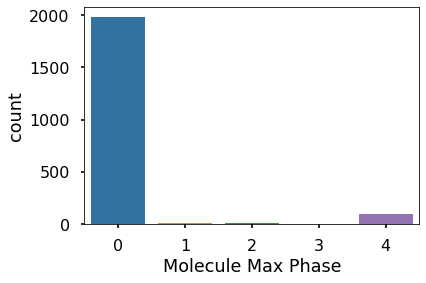

In [202]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Molecule Max Phase',data=df_target)

(array([0, 1]),
 [Text(0, 0, 'Outside typical range'),
  Text(1, 0, 'Potential transcription error')])

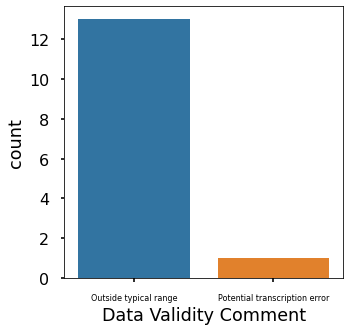

In [203]:
plt.subplots(figsize=(5,5))
sns.countplot(x='Data Validity Comment',data=df_target)
plt.xticks(fontsize=8)

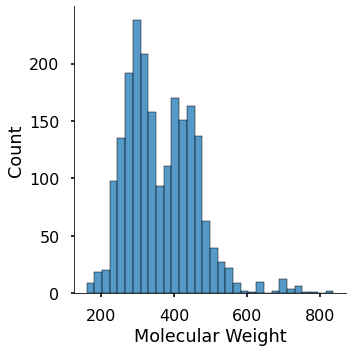

In [204]:
sns.displot(x='Molecular Weight',data=df_target)

<AxesSubplot:xlabel='#RO5 Violations', ylabel='count'>

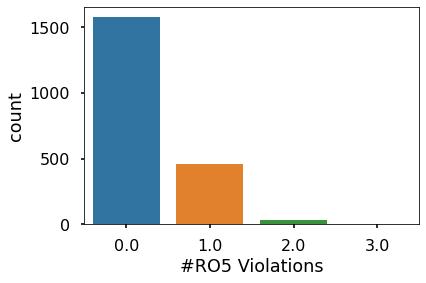

In [205]:
plt.subplots(figsize=(6,4))
sns.countplot(x='#RO5 Violations',data=df_target)

<AxesSubplot:xlabel='Assay Type', ylabel='count'>

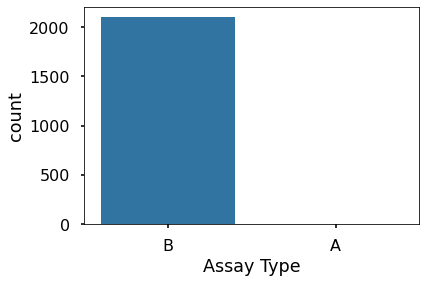

In [206]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Assay Type',data=df_target)

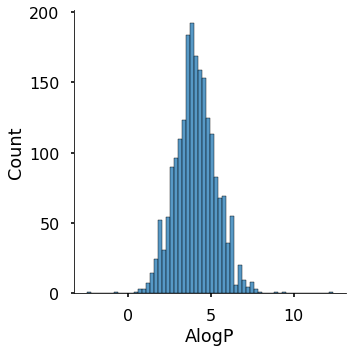

In [207]:
sns.displot(x='AlogP',data=df_target)

<AxesSubplot:xlabel='Standard Relation', ylabel='count'>

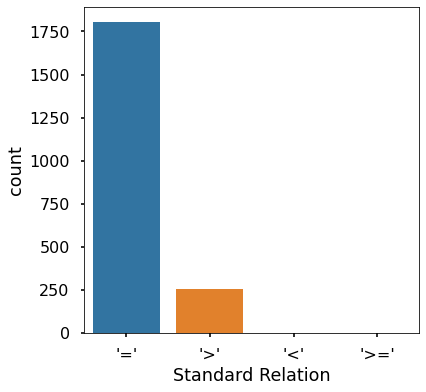

In [208]:
plt.subplots(figsize=(6,6))
sns.countplot(x='Standard Relation',data=df_target)


<AxesSubplot:xlabel='Standard Units', ylabel='count'>

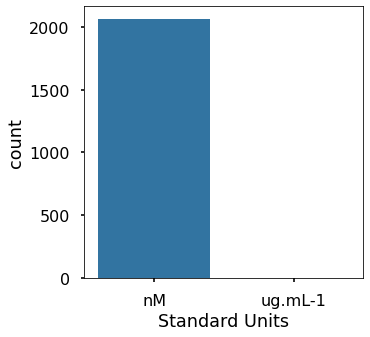

In [209]:
plt.subplots(figsize=(5,5))
sns.countplot(x='Standard Units',data=df_target)

(array([0, 1]), [Text(0, 0, 'UO_0000065'), Text(1, 0, 'UO_0000274')])

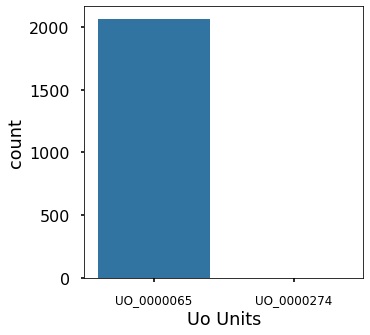

In [210]:
plt.subplots(figsize=(5,5))
sns.countplot(x='Uo Units',data=df_target)
plt.xticks(fontsize=12)

<AxesSubplot:xlabel='Potential Duplicate', ylabel='count'>

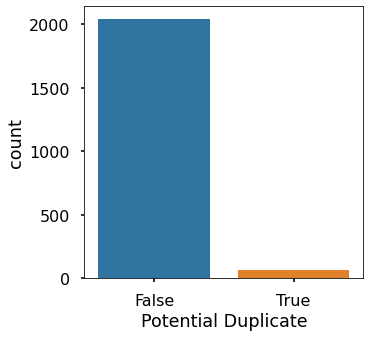

In [211]:
plt.subplots(figsize=(5,5))
sns.countplot(x='Potential Duplicate',data=df_target)

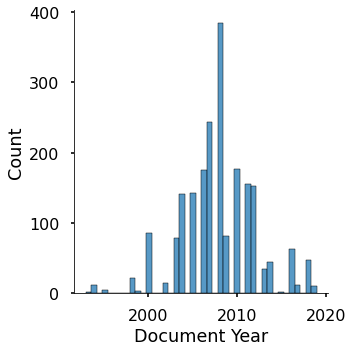

In [212]:
sns.displot(x='Document Year',data=df_target)

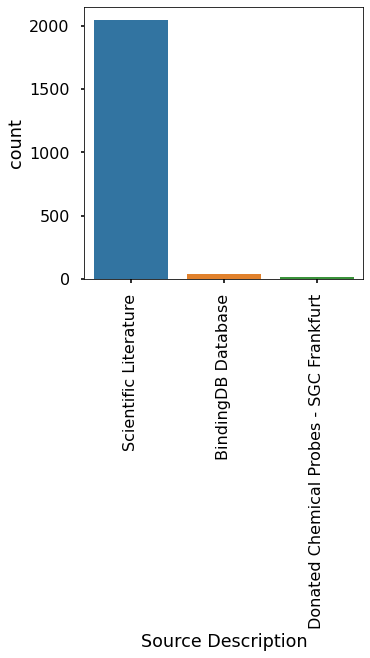

In [213]:
plt.subplots(figsize=(5,5))
sns.countplot(x='Source Description',data=df_target)
plt.xticks(rotation=90);

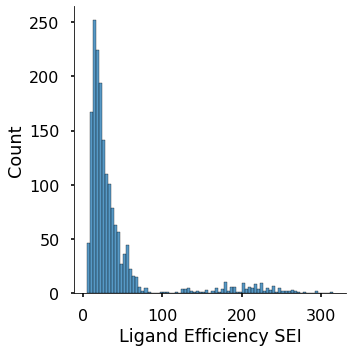

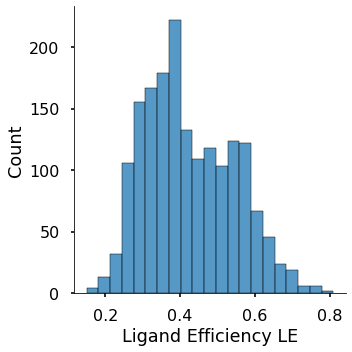

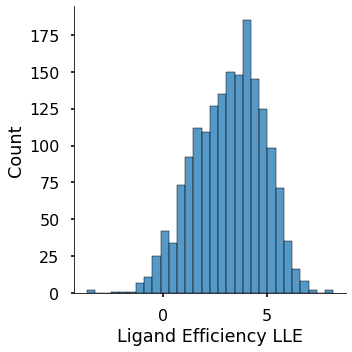

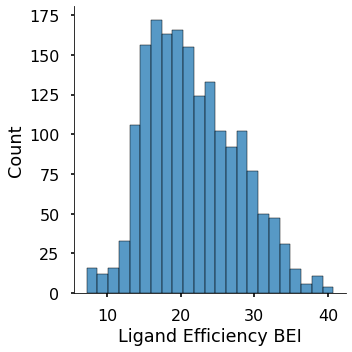

In [214]:
sns.displot(x='Ligand Efficiency SEI', data=df_target)
sns.displot(x='Ligand Efficiency LE', data=df_target)
sns.displot(x='Ligand Efficiency LLE', data=df_target)
sns.displot(x='Ligand Efficiency BEI', data=df_target)

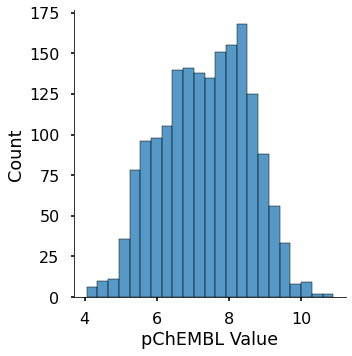

In [215]:
sns.displot(x='pChEMBL Value',data=df_target)

In [216]:
df_target.isna().sum()

Molecule ChEMBL ID          0
Molecule Name            1928
Molecule Max Phase          0
Molecular Weight            0
#RO5 Violations            32
AlogP                      32
Compound Key               17
Smiles                     26
Standard Type               0
Standard Relation          41
Standard Value             41
Standard Units             41
pChEMBL Value             311
Data Validity Comment    2088
Comment                  2023
Uo Units                   41
Ligand Efficiency BEI     313
Ligand Efficiency LE      345
Ligand Efficiency LLE     345
Ligand Efficiency SEI     346
Potential Duplicate         0
Assay ChEMBL ID             0
Assay Description           0
Assay Type                  0
Assay Organism            765
Assay Parameters         2088
Document ChEMBL ID          0
Source ID                   0
Source Description          0
Document Journal           54
Document Year              17
Properties               2102
dtype: int64

In [217]:
df_target.dropna(subset=['pChEMBL Value'],inplace=True)

In [218]:
df_target.isna().sum()

Molecule ChEMBL ID          0
Molecule Name            1637
Molecule Max Phase          0
Molecular Weight            0
#RO5 Violations            32
AlogP                      32
Compound Key               15
Smiles                     26
Standard Type               0
Standard Relation           0
Standard Value              0
Standard Units              0
pChEMBL Value               0
Data Validity Comment    1790
Comment                  1758
Uo Units                    0
Ligand Efficiency BEI       2
Ligand Efficiency LE       34
Ligand Efficiency LLE      34
Ligand Efficiency SEI      35
Potential Duplicate         0
Assay ChEMBL ID             0
Assay Description           0
Assay Type                  0
Assay Organism            648
Assay Parameters         1777
Document ChEMBL ID          0
Source ID                   0
Source Description          0
Document Journal           47
Document Year              15
Properties               1791
dtype: int64

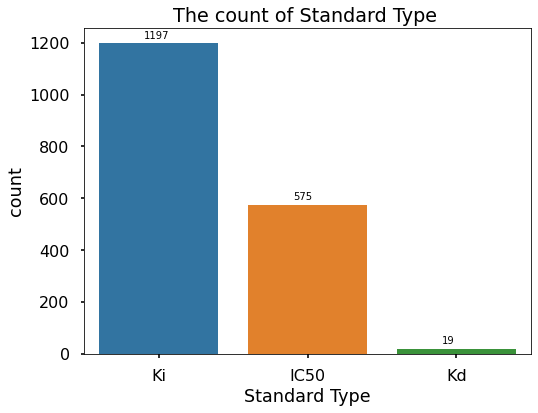

In [219]:
plt.subplots(figsize=(8,6))
ax=sns.countplot(x='Standard Type',data=df_target)
plt.title('The count of Standard Type ')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20));

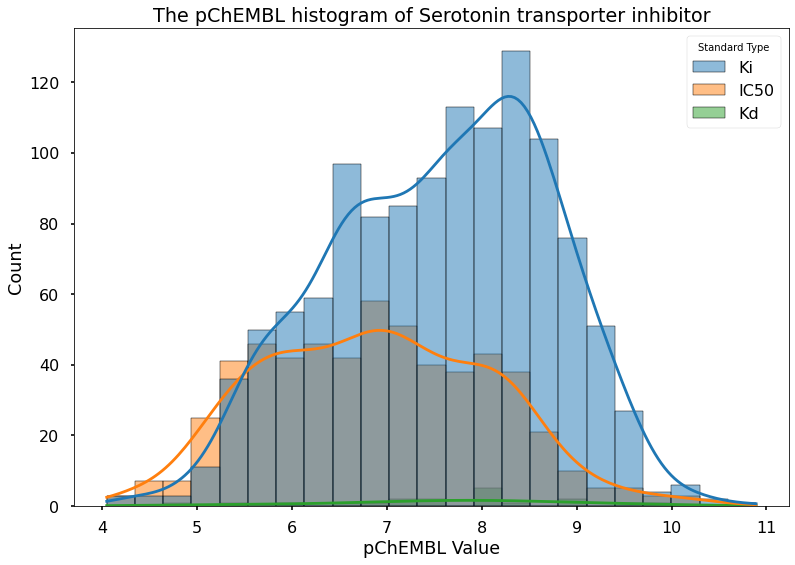

In [220]:
sns.histplot(x='pChEMBL Value',hue ='Standard Type',data=df_target,kde=True)
plt.title('The pChEMBL histogram of Serotonin transporter inhibitor');


In [221]:
print('The average of pChEMBL Value is {}.'. format(round(df_target['pChEMBL Value'].mean(),2)))
print('The median of pChEMBL Value is {}.'. format(round(df_target['pChEMBL Value'].median(),2)))
print('The mode of pChEMBL Value is {}.'. format(round(df_target['pChEMBL Value'].mode().item(),2)))

The average of pChEMBL Value is 7.35.
The median of pChEMBL Value is 7.41.
The mode of pChEMBL Value is 8.7.


In [222]:
df_Ki=pd.DataFrame(df_target.loc[df_target['Standard Type']=='Ki','pChEMBL Value'],columns=['Ki','pChEMBL Value'])

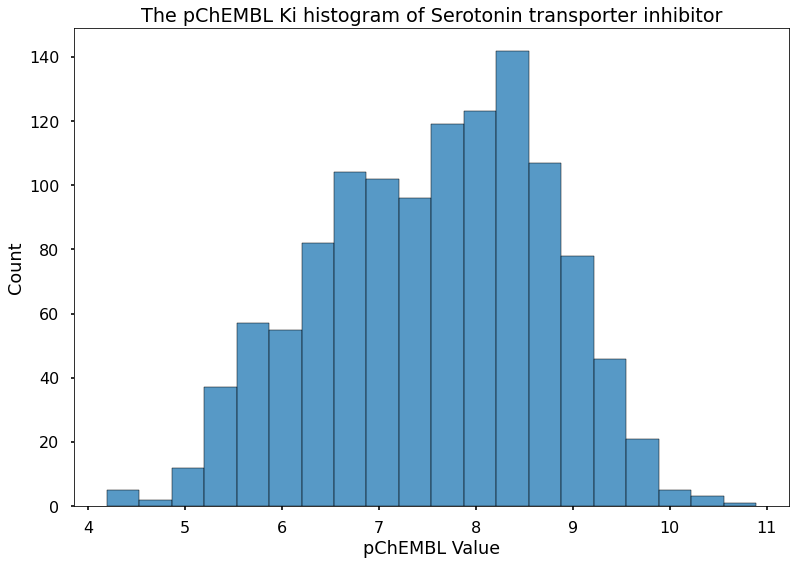

In [223]:
sns.histplot(x='pChEMBL Value',data=df_Ki)
plt.title('The pChEMBL Ki histogram of Serotonin transporter inhibitor');

In [224]:
print('The average of pChEMBL Ki Value is {}.'. format(round(df_Ki['pChEMBL Value'].mean(),2)))
print('The median of pChEMBL Ki Value is {}.'. format(round(df_Ki['pChEMBL Value'].median(),2)))
print('The mode of pChEMBL Ki Value is {}.'. format(round(df_Ki['pChEMBL Value'].mode().item(),2)))


The average of pChEMBL Ki Value is 7.56.
The median of pChEMBL Ki Value is 7.68.
The mode of pChEMBL Ki Value is 8.7.


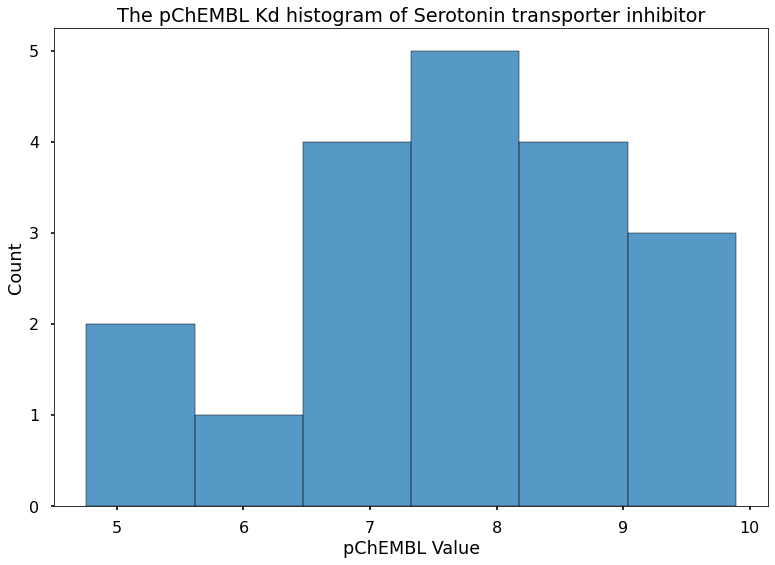

In [225]:
df_Kd=pd.DataFrame(df_target.loc[df_target['Standard Type']=='Kd','pChEMBL Value'],columns=['Kd','pChEMBL Value'])
sns.histplot(x='pChEMBL Value',data=df_Kd)
plt.title('The pChEMBL Kd histogram of Serotonin transporter inhibitor');

In [226]:
print('The average of pChEMBL Kd Value is {}.'.format(round(df_Kd['pChEMBL Value'].mean(),2)))
print('The median of pChEMBL Kd Value is {}.'.format(round(df_Kd['pChEMBL Value'].median(),2)))
print('The mode of pChEMBL Kd Value is {} and {}.'.format(df_Kd['pChEMBL Value'].mode()[0].item(),df_Kd['pChEMBL Value'].mode()[1].item()))

The average of pChEMBL Kd Value is 7.66.
The median of pChEMBL Kd Value is 8.05.
The mode of pChEMBL Kd Value is 8.05 and 8.21.


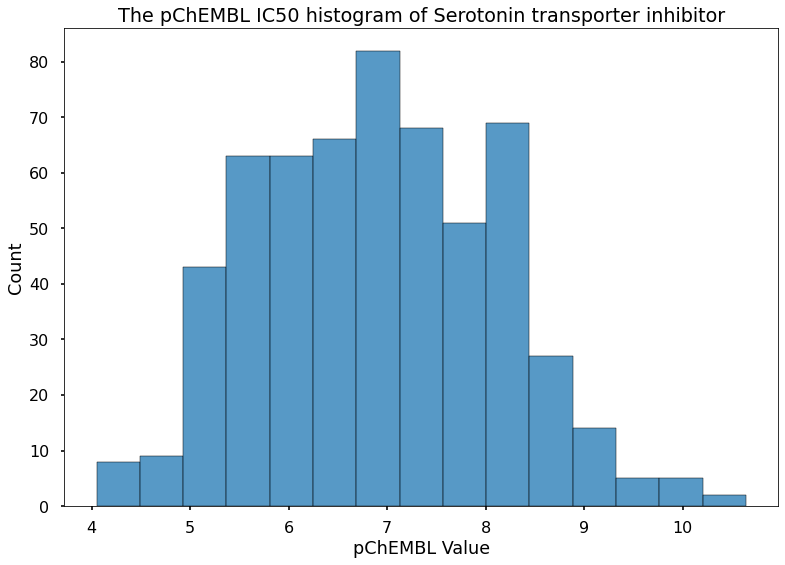

In [227]:
df_IC=pd.DataFrame(df_target.loc[df_target['Standard Type']=='IC50','pChEMBL Value'],columns=['IC50','pChEMBL Value'])
sns.histplot(x='pChEMBL Value',data=df_IC)
plt.title('The pChEMBL IC50 histogram of Serotonin transporter inhibitor');

In [228]:
print('The average of pChEMBL IC50 Value is {}.'. format(round(df_IC['pChEMBL Value'].mean(),2)))
print('The median of pChEMBL IC50 Value is {}.'. format(round(df_IC['pChEMBL Value'].median(),2)))
print('The mode of pChEMBL IC50 Value is {}.'. format(round(df_IC['pChEMBL Value'].mode().item(),2)))

The average of pChEMBL IC50 Value is 6.9.
The median of pChEMBL IC50 Value is 6.89.
The mode of pChEMBL IC50 Value is 7.0.


In [229]:
duplicate = df_target[df_target.duplicated()]
print('There is {} duplicated'.format(df_target.duplicated().sum()))
print('There is {}% duplicated'.format(round(df_target.duplicated().sum()/len(df_target['pChEMBL Value'])*100,2)))

There is 5 duplicated
There is 0.28% duplicated


In [230]:
duplicate

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,Assay Organism,Assay Parameters,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Properties
684,CHEMBL119561,O-1186,0,696.88,NaN,NaN,26a (O-1186),NaN,IC50,'=',1300.0,nM,5.89,NaN,NaN,UO_0000065,8.45,NaN,NaN,NaN,False,CHEMBL806185,In vitro affinity for serotonin transporter in Rhesus (Macaca mulatta) or Cynomolgus (Macaca fas...,B,Cercopithecidae,NaN,CHEMBL1145865,1,Scientific Literature,J. Med. Chem.,2003.0,NaN
1860,CHEMBL440687,NaN,0,293.37,0.0,2.28,NaN,c1ccc(N2CCN(Cc3nc4ccccc4[nH]3)CC2)nc1,Ki,'=',10000.0,nM,5.00,NaN,NaN,UO_0000065,17.04,0.31,2.72,10.41,False,CHEMBL4507817,GPCRScan assay: inhibition of SERT,B,Homo sapiens,Parental cells: stable HEK | PMID: 3475452/20036748 | Protein length: full-length | Radioligand ...,CHEMBL4507260,54,Donated Chemical Probes - SGC Frankfurt,NaN,NaN,NaN
2388,CHEMBL119561,O-1186,0,696.88,NaN,NaN,26a (O-1186),NaN,IC50,'=',1300.0,nM,5.89,NaN,NaN,UO_0000065,8.45,NaN,NaN,NaN,False,CHEMBL806185,In vitro affinity for serotonin transporter in Rhesus (Macaca mulatta) or Cynomolgus (Macaca fas...,B,Cercopithecidae,NaN,CHEMBL1145865,1,Scientific Literature,J. Med. Chem.,2003.0,NaN
2610,CHEMBL3696475,MK-7145,1,466.53,0.0,2.03,12; MK-7145,Cc1c([C@@H](O)CN2CCN(C[C@H](O)c3ccc4c(c3C)COC4=O)CC2)ccc2c1COC2=O,IC50,'=',120.0,nM,6.92,NaN,NaN,UO_0000065,14.83,0.28,4.89,6.95,False,CHEMBL4427531,Inhibition of human SERT,B,Homo sapiens,NaN,CHEMBL4425169,1,Scientific Literature,ACS Med Chem Lett,2016.0,NaN
2619,CHEMBL3589752,NaN,0,403.40,1.0,5.45,NaN,Cc1c(Oc2c(F)cccc2F)c(OC(C)C)nn1-c1ncc(C2CC2)cc1F,Ki,'=',10000.0,nM,5.00,NaN,NaN,UO_0000065,12.39,0.24,-0.45,10.17,False,CHEMBL4507817,GPCRScan assay: inhibition of SERT,B,Homo sapiens,Parental cells: stable HEK | PMID: 3475452/20036748 | Protein length: full-length | Radioligand ...,CHEMBL4507312,54,Donated Chemical Probes - SGC Frankfurt,NaN,NaN,NaN


In [231]:
df_target.drop_duplicates(inplace = True)

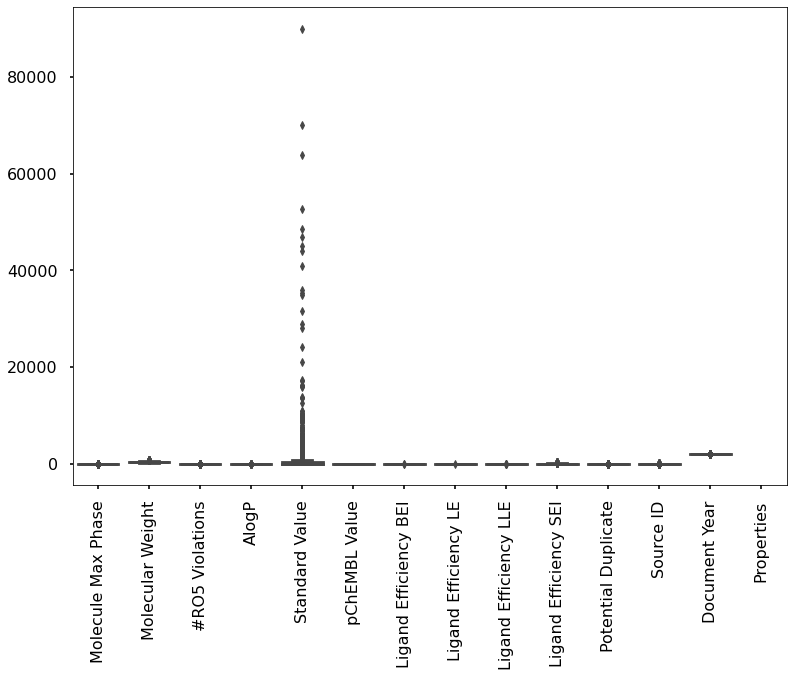

In [232]:
sns.boxplot(data=df_target)
plt.xticks(rotation=90);

In [233]:
outlist=['Standard Value']
outrange = pd.DataFrame(index=['lower','upper'])
for each in outlist:
    mean = np.mean(df_target[each])
    std = np.std(df_target[each])
    lower_range=mean-2*std
    upper_range=mean+2*std
    outrange[each]=[lower_range,upper_range]
outrange
filter1 = (df_target['Standard Value'] > outrange['Standard Value'][1])
filter2 = (df_target['Standard Value'] < outrange['Standard Value'][0])
Outlier_filter = (filter1 | filter2)
df_outliers= df_target[Outlier_filter]
df_outliers['Standard Value'].value_counts()
print("There is {} outliers".format(df_target[Outlier_filter]["Standard Value"].count()))
print('There is {}% outliers'.format(round(len(df_target[Outlier_filter]["Standard Value"])/len(df_target['Standard Value'])*100,2)))

There is 29 outliers
There is 1.62% outliers


In [234]:
df_target=df_target[~Outlier_filter]

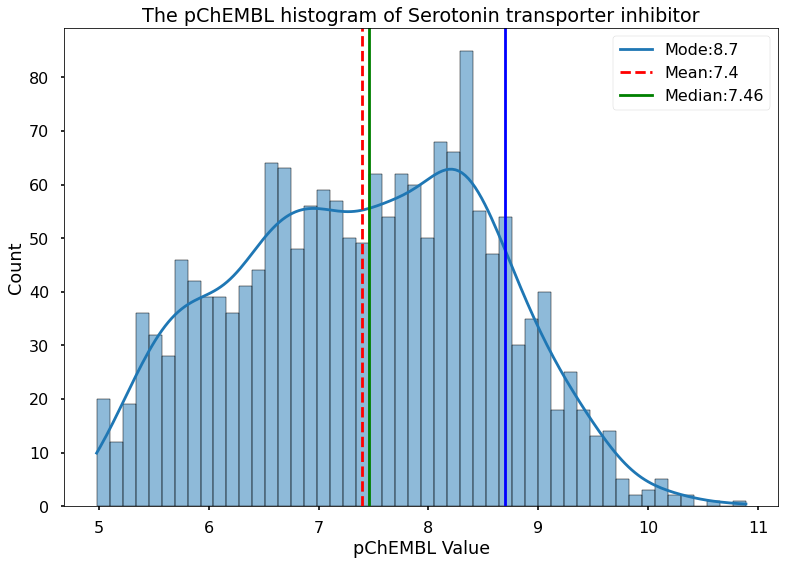

In [240]:
mean=df_target['pChEMBL Value'].mean()
median=df_target['pChEMBL Value'].median()
mode=df_target['pChEMBL Value'].mode().item()
sns.histplot(x='pChEMBL Value',data=df_target,kde=True,bins=50)
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mode:8.7':mode,'Mean:7.4':mean,'Median:7.46':median})
plt.title('The pChEMBL histogram of Serotonin transporter inhibitor')
plt.show();

In [236]:
print('The average of pChEMBL Value is {}.'. format(round(df_target['pChEMBL Value'].mean(),2)))
print('The median of pChEMBL Value is {}.'. format(round(df_target['pChEMBL Value'].median(),2)))
print('The mode of pChEMBL Value is {}.'. format(round(df_target['pChEMBL Value'].mode().item(),2)))

The average of pChEMBL Value is 7.4.
The median of pChEMBL Value is 7.46.
The mode of pChEMBL Value is 8.7.


In [241]:
df_target.shape

(1757, 32)

In [243]:
from scipy.stats import skew
skew(df_target['pChEMBL Value'], bias=False)

-0.03000165067858119

In [245]:
df_targetnor=pd.read_csv('Norepinephrine.csv')

In [246]:
df_targetnor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6327 entries, 0 to 6326
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Molecule ChEMBL ID          6327 non-null   object 
 1   Molecule Name               2077 non-null   object 
 2   Molecule Max Phase          6327 non-null   int64  
 3   Molecular Weight            6303 non-null   float64
 4   #RO5 Violations             6327 non-null   object 
 5   AlogP                       6327 non-null   object 
 6   Compound Key                6327 non-null   object 
 7   Smiles                      6259 non-null   object 
 8   Standard Type               6327 non-null   object 
 9   Standard Relation           4629 non-null   object 
 10  Standard Value              4630 non-null   float64
 11  Standard Units              4630 non-null   object 
 12  pChEMBL Value               4191 non-null   float64
 13  Data Validity Comment       90 no

In [247]:
df_targetnor.dropna(subset=['pChEMBL Value'],inplace=True)


In [248]:
duplicate = df_targetnor[df_targetnor.duplicated()]
print('There is {} duplicated'.format(df_targetnor.duplicated().sum()))
print('There is {}% duplicated'.format(round(df_targetnor.duplicated().sum()/len(df_target['pChEMBL Value'])*100,2)))


There is 8 duplicated
There is 0.46% duplicated


In [249]:
df_targetnor.drop_duplicates(inplace = True)


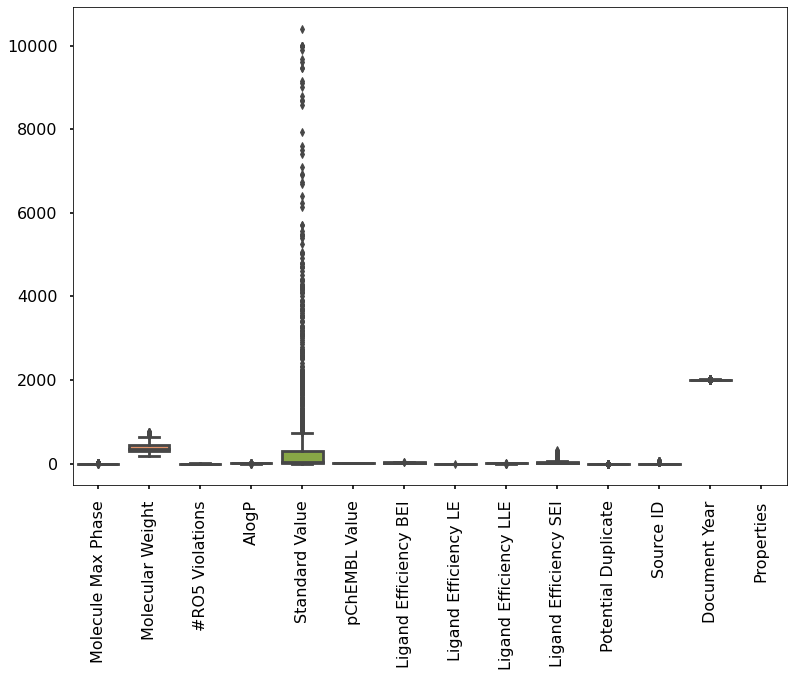

In [250]:
sns.boxplot(data=df_target)
plt.xticks(rotation=90);


In [251]:
outlist1=['Standard Value']
outrange1 = pd.DataFrame(index=['lower','upper'])
for each1 in outlist1:
    mean1 = np.mean(df_targetnor[each1])
    std1 = np.std(df_targetnor[each1])
    lower_range1=mean1-2*std1
    upper_range1=mean1+2*std1
    outrange1[each1]=[lower_range1,upper_range1]
outrange1


,Standard Value
lower,-13720.435366
upper,18117.386469


In [252]:
filter3 = (df_targetnor['Standard Value'] > outrange1['Standard Value'][1])
filter4 = (df_targetnor['Standard Value'] < outrange1['Standard Value'][0])
Outlier_filter1 = (filter3 | filter4)
df_outliers1= df_targetnor[Outlier_filter1]
df_outliers1['Standard Value'].value_counts()
print("There is {} outliers".format(df_targetnor[Outlier_filter1]["Standard Value"].count()))
print('There is {}% outliers'.format(round(len(df_targetnor[Outlier_filter1]["Standard Value"])/len(df_targetnor['Standard Value'])*100,2)))


There is 101 outliers
There is 2.41% outliers


In [253]:
df_targetnor=df_targetnor[~Outlier_filter1]


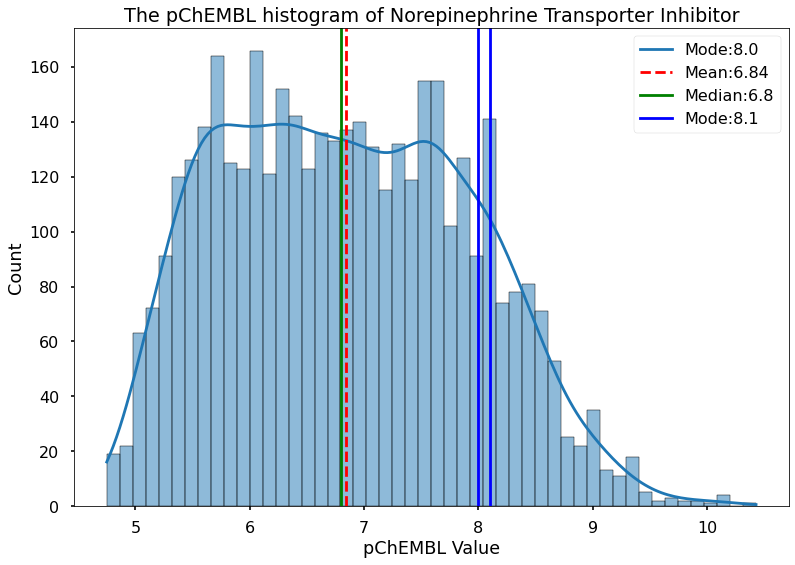

In [263]:
mean1=df_targetnor['pChEMBL Value'].mean()
median1=df_targetnor['pChEMBL Value'].median()
mode1=df_targetnor['pChEMBL Value'].mode()[0].item()
mode2=df_targetnor['pChEMBL Value'].mode()[1].item()
# histogram
sns.histplot(x='pChEMBL Value',data=df_targetnor,kde=True,bins=50)
plt.axvline(mean1, color='r', linestyle='--')
plt.axvline(median1, color='g', linestyle='-')
plt.axvline(mode1, color='b', linestyle='-')
plt.axvline(mode2, color='b', linestyle='-')
plt.legend({'Mode:8.0':mode,'Mean:6.84':mean,'Median:6.8':median,'Mode:8.1':mode,})
plt.title('The pChEMBL histogram of Norepinephrine Transporter Inhibitor')
plt.show();


In [259]:
print('The average of pChEMBL Value is {}.'. format(round(df_targetnor['pChEMBL Value'].mean(),2)))
print('The median of pChEMBL Value is {}.'. format(round(df_targetnor['pChEMBL Value'].median(),2)))
print('The mode of pChEMBL Value is {} & {}.'. format(df_targetnor['pChEMBL Value'].mode()[0].item(),df_targetnor['pChEMBL Value'].mode()[1].item()))


The average of pChEMBL Value is 6.84.
The median of pChEMBL Value is 6.8.
The mode of pChEMBL Value is 8.0 & 8.1.


In [257]:
df_targetnor['pChEMBL Value'].mode()

0    8.0
1    8.1
dtype: float64

In [264]:
skew(df_targetnor['pChEMBL Value'], bias=False)

0.22024445674609133

In [265]:
df_targetnor.shape

(4082, 45)